In [1]:
import os

os.environ["SEED"] = "0"
import numpy as np
import pandas as pd
from ConfigSpace import Configuration

from src.aac.AAC import AAC
from src.configuration_space.LKH import CONFIGURATION_SPACE
from src.constant import DATA_DIR, SEED
from src.database import DB
from src.instance.Instance import Instance
from src.instance.TSP_Instance import TSP_Instance, TSP_train_test_from_index_file
from src.solver.Portfolio import Portfolio
from src.solver.TSP_LKH_Solver import TSP_LKH_Solver
from src.instance.InstanceList import InstanceList

In [2]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=0)

X = np.random.uniform(size=(200, 23))
y = np.random.uniform(size=(200,))
model.fit(X, y)

RandomForestRegressor(random_state=0)

In [4]:
train_instances, test_instances = TSP_train_test_from_index_file(
    filepath=DATA_DIR / "TSP" / "CEPS_benchmark" / "index.json",
    train_size=3,
)
train_instances

InstanceList(size=3)[TSP_Instance(filepath=TSP/CEPS_benchmark/explosion/21.tsp), TSP_Instance(filepath=TSP/CEPS_benchmark/rotation/34.tsp), TSP_Instance(filepath=TSP/CEPS_benchmark/compression/09.tsp)]

In [5]:
portfolio = Portfolio.from_solver_class(TSP_LKH_Solver, size=1)
portfolio

Portfolio(size=1)[Solver(id=52980316141715150)]

In [6]:
portfolio.evaluate(
    train_instances,
    prefix="test",
)

[2024-12-26 22:41:48] DEBUG     Portfolio.evaluate(test)
[2024-12-26 22:41:48] DEBUG     Portfolio(size=1)[Solver(id=52980316141715150)]
[2024-12-26 22:41:48] DEBUG     solve(prefix=test, solver=Solver(id=52980316141715150), instance=TSP_Instance(filepath=TSP/CEPS_benchmark/explosion/21.tsp))
[2024-12-26 22:41:48] DEBUG     solve(prefix=test, solver=Solver(id=52980316141715150), instance=TSP_Instance(filepath=TSP/CEPS_benchmark/rotation/34.tsp))
[2024-12-26 22:41:48] DEBUG     solve(prefix=test, solver=Solver(id=52980316141715150), instance=TSP_Instance(filepath=TSP/CEPS_benchmark/compression/09.tsp))
[2024-12-26 22:41:59] DEBUG     Solver.Result(prefix=test, solver=Solver(id=52980316141715150), instance=TSP_Instance(filepath=TSP/CEPS_benchmark/rotation/34.tsp), cost=100.00, time=10.00, cached=False, surrogate=False, error=False)
[2024-12-26 22:42:05] DEBUG     Solver.Result(prefix=test, solver=Solver(id=52980316141715150), instance=TSP_Instance(filepath=TSP/CEPS_benchmark/explosion/21

Portfolio.Result(prefix=test, cost=100.00, time=[30.00])

In [7]:
db = DB()

In [13]:
db.get_lowest_cost(train_instances[2].id())

100.0

In [6]:
aac = AAC(
    portfolio=portfolio,
    instance_list=train_instances,
    prefix="config",
    t_c=100,
    calculate_features=False,
    estimator=None,
    estimator_pct=0.9
)

In [6]:
for _ in aac.configure():
    if aac.instance_list.size > 2:
        aac.instance_list = InstanceList.from_iterable(aac.instance_list[:2])

[2024-12-26 22:23:40] DEBUG     AAC(prefix=config, iter=1, configuration_time=[100.00])
[2024-12-26 22:23:40] DEBUG     Portfolio.evaluate(config;aac_iter=1)
[2024-12-26 22:23:40] DEBUG     Portfolio(size=1)[Solver(id=52980316141715150)]
[2024-12-26 22:23:40] DEBUG     solve(prefix=config;aac_iter=1, solver=Solver(id=52980316141715150), instance=TSP_Instance(filepath=TSP/CEPS_benchmark/explosion/21.tsp))
[2024-12-26 22:23:40] DEBUG     solve(prefix=config;aac_iter=1, solver=Solver(id=52980316141715150), instance=TSP_Instance(filepath=TSP/CEPS_benchmark/rotation/34.tsp))
[2024-12-26 22:23:40] DEBUG     solve(prefix=config;aac_iter=1, solver=Solver(id=52980316141715150), instance=TSP_Instance(filepath=TSP/CEPS_benchmark/compression/09.tsp))
[2024-12-26 22:23:51] DEBUG     Solver.Result(prefix=config;aac_iter=1, solver=Solver(id=52980316141715150), instance=TSP_Instance(filepath=TSP/CEPS_benchmark/rotation/34.tsp), cost=100.00, time=10.00, cached=False, surrogate=False, error=False)
[2024

In [7]:
aac.portfolio

Portfolio(size=1)[Solver(id=52980316141715150)]

In [23]:
portfolio.evaluate(
    InstanceList.from_iterable(test_instances[:10]),
    prefix="test",
)

[2024-12-26 20:07:05] DEBUG     Portfolio.evaluate(test)
[2024-12-26 20:07:05] DEBUG     Portfolio(size=1)[Solver(id=1698116714322918352)]
[2024-12-26 20:07:05] DEBUG     solve(prefix=test, solver=Solver(id=1698116714322918352), instance=TSP_Instance(filepath=TSP/CEPS_benchmark/implosion/34.tsp))
[2024-12-26 20:07:05] DEBUG     solve(prefix=test, solver=Solver(id=1698116714322918352), instance=TSP_Instance(filepath=TSP/CEPS_benchmark/linearprojection/25.tsp))
[2024-12-26 20:07:05] DEBUG     solve(prefix=test, solver=Solver(id=1698116714322918352), instance=TSP_Instance(filepath=TSP/CEPS_benchmark/cluster_netgen/21.tsp))
[2024-12-26 20:07:05] DEBUG     solve(prefix=test, solver=Solver(id=1698116714322918352), instance=TSP_Instance(filepath=TSP/CEPS_benchmark/linearprojection/28.tsp))
[2024-12-26 20:07:05] DEBUG     solve(prefix=test, solver=Solver(id=1698116714322918352), instance=TSP_Instance(filepath=TSP/CEPS_benchmark/explosion/05.tsp))
[2024-12-26 20:07:05] DEBUG     solve(prefix=te

Portfolio.Result(prefix=test, cost=42.21, time=[62.06])

In [14]:
# db = DB()
db = DB("database/run-test_923830.db")

In [15]:
pd.read_sql_query("SELECT * FROM instances", db._conn)

,id,filepath,optimum,angle_min,angle_median,angle_mean,angle_max,angle_sd,angle_span,angle_coef_of_var,...,bc_no1s_min,bc_no1s_q25,bc_no1s_q50,bc_no1s_q75,bc_no1s_max,bc_p1s,bc_pn1s,bcTime,acc,acfTime
0,855157651668393360,TSP/CEPS_benchmark/explosion/21.tsp,14928292.0,0.006290,1.484946,1.522267,3.139028,0.916031,3.132738,0.601754,...,0.125000,0.500000,0.5,0.500000,0.875000,0.90125,0.20000,0.21,450.566621,0.68
1,1353678304570487518,TSP/CEPS_benchmark/rotation/34.tsp,15486460.0,0.000684,1.495912,1.523094,3.138384,0.912371,3.137700,0.599025,...,0.111111,0.500000,0.5,0.500000,0.888889,0.87750,0.24750,0.08,394.965129,0.42
2,810870798045289410,TSP/CEPS_benchmark/compression/09.tsp,16003060.0,0.000000,1.417332,1.483901,3.141593,1.026220,3.141593,0.691569,...,0.166667,0.500000,0.5,0.500000,0.833333,0.87125,0.26500,0.15,431.220045,0.72
3,1306299629087479721,TSP/CEPS_benchmark/implosion/34.tsp,19968838.0,0.000395,1.483846,1.518058,3.138849,0.916994,3.138454,0.604057,...,0.125000,0.333333,0.5,0.666667,0.875000,0.86500,0.27375,0.10,400.640868,0.42
4,410041616729589825,TSP/CEPS_benchmark/linearprojection/25.tsp,13578491.0,0.009872,1.625140,1.570276,3.131472,0.931936,3.121600,0.593485,...,0.250000,0.500000,0.5,0.500000,0.750000,0.87500,0.25500,0.16,382.995621,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,707351994282137341,TSP/CEPS_benchmark/cluster/19.tsp,19287084.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,540324668286432217,TSP/CEPS_benchmark/uniform_portgen/27.tsp,20825913.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,1765803814609198146,TSP/CEPS_benchmark/grid/00.tsp,21258773.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,1378924496111515287,TSP/CEPS_benchmark/explosion/32.tsp,12927140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
pd.read_sql_query("SELECT * FROM solvers", db._conn)

,id,ASCENT_CANDIDATES,BACKBONE_TRIALS,BACKTRACKING,CANDIDATE_SET_TYPE,EXTRA_CANDIDATES,EXTRA_CANDIDATE_SET_TYPE,GAIN23,GAIN_CRITERION,INITIAL_STEP_SIZE,...,MAX_BREADTH,MAX_CANDIDATES,MOVE_TYPE,PATCHING_A,PATCHING_C,POPULATION_SIZE,RESTRICTED_SEARCH,SUBGRADIENT,SUBSEQUENT_MOVE_TYPE,SUBSEQUENT_PATCHING
0,52980316141715150,0.60,1.0,0.0,0.0,0.7,0.0,1.0,0.0,0.00,...,0.444643,1.000000,0.25,0.6,0.2,0.061224,0.0,0.0,5.0,1.0
1,287011037061967493,0.75,0.0,0.0,0.0,0.3,0.0,1.0,0.0,0.00,...,0.592453,0.777778,0.75,0.8,0.2,0.836735,1.0,1.0,3.0,1.0
2,176228367859327934,0.85,1.0,0.0,0.0,0.4,0.0,0.0,1.0,0.50,...,0.354664,0.333333,0.25,0.8,0.4,0.408163,1.0,1.0,2.0,0.0
3,2041120758543581287,0.80,1.0,0.0,2.0,0.7,0.0,1.0,0.0,0.25,...,0.365942,1.000000,0.25,0.6,0.8,0.051020,0.0,1.0,5.0,0.0
4,1056464823932360013,0.65,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.00,...,0.322513,0.666667,1.00,0.8,0.8,0.112245,0.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1543248257296619305,0.00,0.0,0.0,2.0,0.6,0.0,1.0,1.0,0.50,...,0.713917,1.000000,0.25,0.6,0.8,0.693878,1.0,1.0,1.0,1.0
77,1997176499706663462,0.45,0.0,1.0,3.0,0.3,0.0,0.0,1.0,1.00,...,0.497030,0.555556,1.00,1.0,0.8,0.408163,1.0,1.0,3.0,1.0
78,581181491700982781,0.05,1.0,1.0,3.0,0.6,0.0,0.0,0.0,0.75,...,0.515792,0.222222,0.75,0.0,0.6,0.102041,1.0,0.0,3.0,1.0
79,16557392879338281,0.55,0.0,1.0,1.0,0.2,0.0,0.0,1.0,0.50,...,0.686544,0.777778,0.00,0.0,0.8,0.673469,0.0,1.0,1.0,0.0


In [17]:
results = pd.read_sql_query("SELECT * FROM results", db._conn)
results

,id,prefix,solver_id,instance_id,cost,time,cached,surrogate,error
0,config;aac_iter=1_52980316141715150_8551576516...,config;aac_iter=1,52980316141715150,855157651668393360,100.00,23.448853,0,0,0
1,config;aac_iter=1_52980316141715150_1353678304...,config;aac_iter=1,52980316141715150,1353678304570487518,100.00,15.938080,0,0,0
2,config;aac_iter=1_52980316141715150_1306299629...,config;aac_iter=1,52980316141715150,1306299629087479721,3.04,8.142928,0,0,0
3,config;aac_iter=1_52980316141715150_8108707980...,config;aac_iter=1,52980316141715150,810870798045289410,100.00,16.167195,0,0,0
4,config;aac_iter=1_52980316141715150_4100416167...,config;aac_iter=1,52980316141715150,410041616729589825,100.00,17.013006,0,0,0
...,...,...,...,...,...,...,...,...,...
495,test_2015280438004251377_1667136710979054795,test,2015280438004251377,1667136710979054795,100.00,10.000000,0,0,0
496,test_2015280438004251377_707351994282137341,test,2015280438004251377,707351994282137341,100.00,10.000000,0,0,0
497,test_2015280438004251377_1765803814609198146,test,2015280438004251377,1765803814609198146,2.71,2.710000,0,0,0
498,test_2015280438004251377_366756074013316631,test,2015280438004251377,366756074013316631,5.29,5.290000,0,0,0


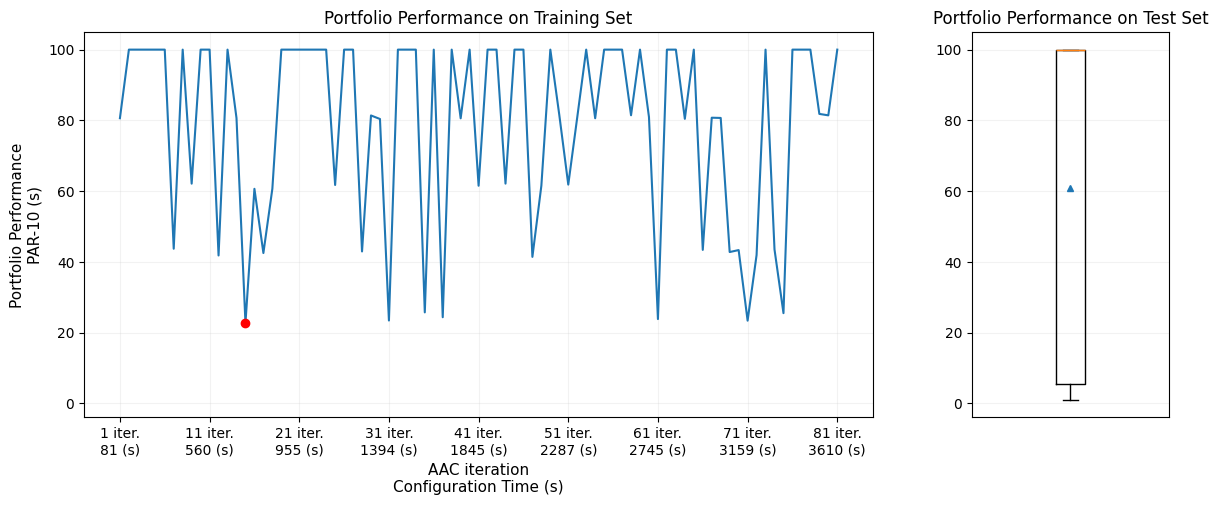

In [94]:
import matplotlib.pyplot as plt
FONT_COLOR = "#22373a"
FILL_COLOR = "#b4cccf"

plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.25
plt.rcParams["grid.color"] = "#cccccc"


_ = results.loc[lambda x: x["prefix"].str.startswith("config")].copy() 
_.loc[:, "aac_iter"] = _["prefix"].str.extract(r'aac_iter=(\d+)').astype(int)
_ = _.groupby(["aac_iter", "instance_id"]).agg({"cost": "min", "time": "sum"}).reset_index()
_ = _.groupby("aac_iter").agg({"cost": "mean", "time": "sum"}).reset_index()
_ = _.sort_values("aac_iter")
_["time"] = _["time"].cumsum()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, width_ratios=[4, 1], figsize=(14, 5), sharey=True)
ax1.plot(_["aac_iter"], _["cost"])

min_cost_idx = _["cost"].idxmin()
ax1.plot(_["aac_iter"][min_cost_idx], _["cost"][min_cost_idx], 'ro')

ax1.set_xticks(_["aac_iter"][::10])
ax1.set_xticklabels([f'{iter_val} iter.\n{time_val:.0f} (s)' for iter_val, time_val in zip(_["aac_iter"][::10], _["time"][::10])])
ax1.set_xlabel("AAC iteration\nConfiguration Time (s)", fontsize=11)
ax1.set_ylabel("Portfolio Performance\nPAR-10 (s)", fontsize=11)
ax1.set_title("Portfolio Performance on Training Set", fontsize=12)

_ = results.loc[lambda x: x["prefix"].str.startswith("test")].copy() 
ax2.boxplot(_["cost"])

mean_value = _["cost"].mean()
ax2.plot([1], [mean_value], marker="^", markersize=5)

ax2.yaxis.set_visible(True)
ax2.tick_params(axis="y", which="both", labelleft=True)
ax2.xaxis.set_visible(False)
ax2.set_title("Portfolio Performance on Test Set", fontsize=12)
ax2.yaxis.grid(True)
ax2.xaxis.grid(False)

plt.savefig("portfolio_performance.png", dpi=300, bbox_inches="tight")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1f691fb3340>,
 'caps': [<matplotlib.lines.Line2D at 0x1f691fb3760>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f691fb30a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f691fb3ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f691fb3f40>],
 'means': []}

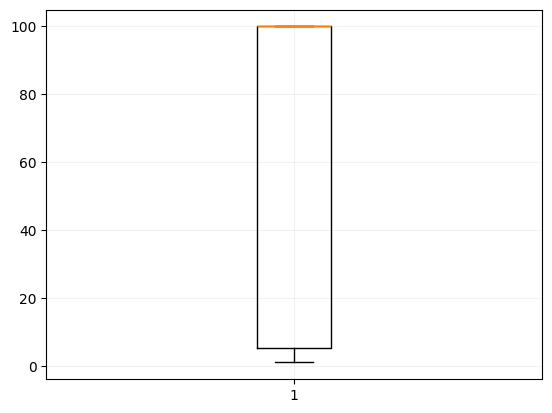

In [19]:
_

,prefix,cost,aac_iter
0,config;aac_iter=1,80.608,1
11,config;aac_iter=2,100.000,2
22,config;aac_iter=3,100.000,3
33,config;aac_iter=4,100.000,4
44,config;aac_iter=5,100.000,5
...,...,...,...
74,config;aac_iter=77,100.000,77
75,config;aac_iter=78,100.000,78
76,config;aac_iter=79,81.824,79
78,config;aac_iter=80,81.420,80


In [18]:
pd.read_sql_query("SELECT * FROM evaluations", db._conn)

,id,solver_id,instance_id,cost
0,52980316141715150_855157651668393360,52980316141715150,855157651668393360,100.00
1,52980316141715150_1353678304570487518,52980316141715150,1353678304570487518,100.00
2,52980316141715150_1306299629087479721,52980316141715150,1306299629087479721,3.04
3,52980316141715150_810870798045289410,52980316141715150,810870798045289410,100.00
4,52980316141715150_410041616729589825,52980316141715150,410041616729589825,100.00
...,...,...,...,...
495,2015280438004251377_1667136710979054795,2015280438004251377,1667136710979054795,100.00
496,2015280438004251377_707351994282137341,2015280438004251377,707351994282137341,100.00
497,2015280438004251377_1765803814609198146,2015280438004251377,1765803814609198146,2.71
498,2015280438004251377_366756074013316631,2015280438004251377,366756074013316631,5.29
